In [14]:
import requests
import datetime
import json

headers = {"X-API-KEY": "6RNKXW4-W1VMWSY-H8Q28VN-Y08M8WS"}


def get_movies_for_last_year():
    params = {
        'selectFields': 'name movieLength genres rating type votes year budget fees distributors premiere',
        'type': 'movie',
        'sortField': 'votes.kp',
        'sortType': '-1',
        'limit': 4000
    }
    response = requests.get(
        'https://api.kinopoisk.dev/v1.3/movie',
        headers=headers,
        params=params
    )

    return response.text


movies = get_movies_for_last_year()
movies = movies.replace('\xa0', ' ')

with open('data.txt', 'w') as file:
    file.write(str(json.loads(movies)))
    file.flush()

formatted = json.loads(movies)
print(len(formatted['docs']))
# print(json.dumps(formatted, sort_keys=True, indent=4, ensure_ascii=True))

4000


In [83]:
dict = formatted['docs']
dict

[{'fees': {'world': {'value': 426588510, 'currency': '$'},
   'russia': {'value': 1725813, 'currency': '$'},
   'usa': {'value': 10198820, 'currency': '$'}},
  'rating': {'kp': 8.805,
   'imdb': 8.5,
   'filmCritics': 6.8,
   'russianFilmCritics': 100,
   'await': None},
  'votes': {'kp': 1571449,
   'imdb': 877853,
   'filmCritics': 130,
   'russianFilmCritics': 12,
   'await': 15},
  'movieLength': 112,
  'type': 'movie',
  'name': '1+1',
  'distributors': {'distributor': 'Каскад фильм',
   'distributorRelease': 'Новый Диск'},
  'premiere': {'world': '2011-09-23T00:00:00.000Z',
   'russia': '2012-04-26T00:00:00.000Z'},
  'year': 2011,
  'budget': {'value': 9500000, 'currency': '€'},
  'genres': [{'name': 'драма'}, {'name': 'комедия'}, {'name': 'биография'}]},
 {'fees': {'world': {'value': 115171795, 'currency': '$'},
   'russia': {'value': 18003343, 'currency': '$'},
   'usa': {'value': 36471795, 'currency': '$'}},
  'rating': {'kp': 8.544,
   'imdb': 7.8,
   'filmCritics': 6.5,
   '

In [77]:
import pandas as pd
df_l = pd.json_normalize(dict)
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd,premiere.country,premiere.cinema,premiere.bluray
0,112.0,movie,1+1,2011,"[{'name': 'драма'}, {'name': 'комедия'}, {'nam...",426588510.0,$,1725813.0,$,10198820.0,...,Новый Диск,2011-09-23T00:00:00.000Z,2012-04-26T00:00:00.000Z,9500000.0,€,NaN,NaN,NaN,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[{'name': 'криминал'}, {'name': 'комедия'}, {'...",115171795.0,$,18003343.0,$,36471795.0,...,None,2019-12-03T00:00:00.000Z,2020-02-13T00:00:00.000Z,22000000.0,$,NaN,NaN,NaN,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[{'name': 'драма'}, {'name': 'криминал'}, {'na...",392000694.0,$,13796916.0,$,116900694.0,...,West Video,2013-12-09T00:00:00.000Z,2014-02-06T00:00:00.000Z,100000000.0,$,NaN,NaN,NaN,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[{'name': 'боевик'}, {'name': 'триллер'}]",103966489.0,$,13318455.0,$,27466489.0,...,None,2021-04-22T00:00:00.000Z,2021-04-22T00:00:00.000Z,40000000.0,$,NaN,NaN,NaN,NaN,NaN
4,100.0,movie,Брат,1997,"[{'name': 'драма'}, {'name': 'криминал'}, {'na...",1362281.0,$,NaN,NaN,NaN,...,Союз-Видео,1997-05-17T00:00:00.000Z,1997-12-12T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,87.0,movie,Пережить Рождество,2004,"[{'name': 'мелодрама'}, {'name': 'комедия'}]",14793624.0,$,1070000.0,$,11663156.0,...,ВС трейд,2004-10-14T00:00:00.000Z,2004-12-16T00:00:00.000Z,45000000.0,$,NaN,NaN,NaN,NaN,NaN
3996,99.0,movie,Душевная кухня,2009,"[{'name': 'драма'}, {'name': 'комедия'}]",17872796.0,$,281522.0,$,276901.0,...,Вольга,2009-09-10T00:00:00.000Z,2010-01-21T00:00:00.000Z,4000000.0,€,NaN,NaN,NaN,NaN,NaN
3997,108.0,movie,Самоволка,1990,"[{'name': 'боевик'}, {'name': 'драма'}]",24271196.0,$,NaN,NaN,24078196.0,...,Твистер,1990-08-01T00:00:00.000Z,1993-11-29T00:00:00.000Z,6000000.0,$,NaN,NaN,NaN,NaN,NaN
3998,112.0,movie,Классный мюзикл. Выпускной,2008,"[{'name': 'мюзикл'}, {'name': 'драма'}, {'name...",252909177.0,$,733900.0,$,90559416.0,...,Уолт Дисней Компани СНГ,2008-09-28T00:00:00.000Z,2008-11-13T00:00:00.000Z,11000000.0,$,NaN,NaN,NaN,NaN,NaN


In [89]:
import re
df_l['genres'] = df_l['genres'].apply(lambda x: re.findall(r"'name': '([^']*)'", str(x)))

In [90]:
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd,premiere.country,premiere.cinema,premiere.bluray
0,112.0,movie,1+1,2011,[],426588510.0,$,1725813.0,$,10198820.0,...,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,9500000.0,€,NaN,NaN,NaN,NaN,NaN
1,113.0,movie,Джентльмены,2019,[],115171795.0,$,18003343.0,$,36471795.0,...,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,$,NaN,NaN,NaN,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,[],392000694.0,$,13796916.0,$,116900694.0,...,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,$,NaN,NaN,NaN,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,[],103966489.0,$,13318455.0,$,27466489.0,...,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,$,NaN,NaN,NaN,NaN,NaN
4,100.0,movie,Брат,1997,[],1362281.0,$,NaN,NaN,NaN,...,Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,87.0,movie,Пережить Рождество,2004,[],14793624.0,$,1070000.0,$,11663156.0,...,ВС трейд,2004-10-14 00:00:00+00:00,2004-12-16 00:00:00+00:00,45000000.0,$,NaN,NaN,NaN,NaN,NaN
3996,99.0,movie,Душевная кухня,2009,[],17872796.0,$,281522.0,$,276901.0,...,Вольга,2009-09-10 00:00:00+00:00,2010-01-21 00:00:00+00:00,4000000.0,€,NaN,NaN,NaN,NaN,NaN
3997,108.0,movie,Самоволка,1990,[],24271196.0,$,NaN,NaN,24078196.0,...,Твистер,1990-08-01 00:00:00+00:00,1993-11-29 00:00:00+00:00,6000000.0,$,NaN,NaN,NaN,NaN,NaN
3998,112.0,movie,Классный мюзикл. Выпускной,2008,[],252909177.0,$,733900.0,$,90559416.0,...,Уолт Дисней Компани СНГ,2008-09-28 00:00:00+00:00,2008-11-13 00:00:00+00:00,11000000.0,$,NaN,NaN,NaN,NaN,NaN


In [85]:
df_l['premiere.world'] = pd.to_datetime(df_l['premiere.world'])
df_l['premiere.russia'] = pd.to_datetime(df_l['premiere.russia'])

In [41]:
df_l

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd,premiere.country,premiere.cinema,premiere.bluray
0,112.0,movie,1+1,2011,"[драма, комедия, биография]",426588510.0,$,1725813.0,$,10198820.0,...,Новый Диск,2011-09-23 00:00:00+00:00,2012-04-26 00:00:00+00:00,9500000.0,€,NaN,NaN,NaN,NaN,NaN
1,113.0,movie,Джентльмены,2019,"[криминал, комедия, боевик]",115171795.0,$,18003343.0,$,36471795.0,...,None,2019-12-03 00:00:00+00:00,2020-02-13 00:00:00+00:00,22000000.0,$,NaN,NaN,NaN,NaN,NaN
2,180.0,movie,Волк с Уолл-стрит,2013,"[драма, криминал, биография, комедия]",392000694.0,$,13796916.0,$,116900694.0,...,West Video,2013-12-09 00:00:00+00:00,2014-02-06 00:00:00+00:00,100000000.0,$,NaN,NaN,NaN,NaN,NaN
3,119.0,movie,Гнев человеческий,2021,"[боевик, триллер]",103966489.0,$,13318455.0,$,27466489.0,...,None,2021-04-22 00:00:00+00:00,2021-04-22 00:00:00+00:00,40000000.0,$,NaN,NaN,NaN,NaN,NaN
4,100.0,movie,Брат,1997,"[драма, криминал, боевик]",1362281.0,$,NaN,NaN,NaN,...,Союз-Видео,1997-05-17 00:00:00+00:00,1997-12-12 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,87.0,movie,Пережить Рождество,2004,"[мелодрама, комедия]",14793624.0,$,1070000.0,$,11663156.0,...,ВС трейд,2004-10-14 00:00:00+00:00,2004-12-16 00:00:00+00:00,45000000.0,$,NaN,NaN,NaN,NaN,NaN
3996,99.0,movie,Душевная кухня,2009,"[драма, комедия]",17872796.0,$,281522.0,$,276901.0,...,Вольга,2009-09-10 00:00:00+00:00,2010-01-21 00:00:00+00:00,4000000.0,€,NaN,NaN,NaN,NaN,NaN
3997,108.0,movie,Самоволка,1990,"[боевик, драма]",24271196.0,$,NaN,NaN,24078196.0,...,Твистер,1990-08-01 00:00:00+00:00,1993-11-29 00:00:00+00:00,6000000.0,$,NaN,NaN,NaN,NaN,NaN
3998,112.0,movie,Классный мюзикл. Выпускной,2008,"[мюзикл, драма, мелодрама, комедия, семейный, ...",252909177.0,$,733900.0,$,90559416.0,...,Уолт Дисней Компани СНГ,2008-09-28 00:00:00+00:00,2008-11-13 00:00:00+00:00,11000000.0,$,NaN,NaN,NaN,NaN,NaN


In [91]:
df_l.dtypes

movieLength                                    float64
type                                            object
name                                            object
year                                             int64
genres                                          object
fees.world.value                               float64
fees.world.currency                             object
fees.russia.value                              float64
fees.russia.currency                            object
fees.usa.value                                 float64
fees.usa.currency                               object
rating.kp                                      float64
rating.imdb                                    float64
rating.filmCritics                             float64
rating.russianFilmCritics                      float64
rating.await                                   float64
votes.kp                                         int64
votes.imdb                                       int64
votes.film

In [94]:
missing_values = df_l.isna().sum()
missing_values

movieLength                           1
type                                  0
name                                  0
year                                  0
genres                                0
fees.world.value                    417
fees.world.currency                 417
fees.russia.value                  1270
fees.russia.currency               1270
fees.usa.value                     1162
fees.usa.currency                  1162
rating.kp                             0
rating.imdb                           0
rating.filmCritics                    0
rating.russianFilmCritics             0
rating.await                       3933
votes.kp                              0
votes.imdb                            0
votes.filmCritics                     0
votes.russianFilmCritics              0
votes.await                           0
distributors.distributor           1097
distributors.distributorRelease    1495
premiere.world                      154
premiere.russia                     889


#### Довольно много пропусков, так как всего 4000 наблюдений, а в колонках premiere.digital, rating.await, premiere.dvd,premiere.country, premiere.cinema и premiere.bluray пропусков от 3993 до 3998, то удаляем эти колонки

In [96]:
row_with_missing_value = df_l[df_l['movieLength'].isnull()]
row_with_missing_value

,movieLength,type,name,year,genres,fees.world.value,fees.world.currency,fees.russia.value,fees.russia.currency,fees.usa.value,...,distributors.distributorRelease,premiere.world,premiere.russia,budget.value,budget.currency,premiere.digital,premiere.dvd,premiere.country,premiere.cinema,premiere.bluray
3536,NaN,movie,Не игра,2018,[],NaN,NaN,NaN,NaN,NaN,...,None,2018-02-16 00:00:00+00:00,NaT,NaN,None,None,None,None,None,None


#### 1. MovieLength - один пропуск, это фильм "Не игра" -> удаляем строчку
#### 2. Валюту нужно привести к единому значению -> переводим евро в доллары
#### 3. Fees.world.value и fees.world.currency - пропуски в fees.world.value, из-за этого пропуски в валюте -> заменяем пропуски на среднее
#### 4. Fees.russia.value/currency, fees.usa.value/currency, budget.value/currency - аналогичный подход
#### 5. Distributors.distributor, distributors.distributorRelease - заполнить самым частым дистрибьютером будет не репрезентативно, с другой стороны, отсутсвие дистрибьютера может означатье еще и отсутвие открытых данных или фильм слишком древний и тогда не было дистрибьютеров. При этом, в 398 наблюдениях есть дата релиза дистрибьютором, но дистрибьютера. Мы решили заполнить это 'other'
#### 6. Premiere.world и premiere.russia имеют пропуски, в мире заполним самым популярным временем)))

In [99]:
df_l = df_l.drop(df_l[df_l['name'] == 'Не игра'].index) #дроп строчки с фильмом

In [121]:
df_l_dropped = df_l.drop(['premiere.digital', 'premiere.dvd', 'premiere.country', 'premiere.cinema', 'rating.await', 'premiere.bluray'], axis=1)
#дроп 5 столбцов с большим количеством пропусков

In [122]:
filtered_df = df_l_dropped[df_l_dropped['fees.world.currency'] == '$']
mfees_value_world = filtered_df['fees.world.value'].mean() # Вычисление среднего значения столбца "fees.world.value" для отфильтрованных строк
mfees_value_world

123640788.57605359

In [123]:
filtered_df = df_l_dropped[df_l_dropped['fees.russia.currency'] == '$']
mfees_value_russia = filtered_df['fees.russia.value'].mean()
mfees_value_russia

4299564.86959707

In [124]:
filtered_df = df_l_dropped[df_l_dropped['fees.usa.currency'] == '$']
mfees_value_usa = filtered_df['fees.usa.value'].mean()
mfees_value_usa

65027615.410852715

In [125]:
filtered_df = df_l_dropped[df_l_dropped['budget.currency'] == '$']
mbudget_value = filtered_df['budget.value'].mean()
mbudget_value

48985931.81787584

In [165]:
# Замена пропущенных значений
df_l_dropped['fees.world.value'] = df_l_dropped['fees.world.value'].fillna('mfees_value_world')
df_l_dropped['fees.russia.value'] = df_l_dropped['fees.russia.value'].fillna('mfees_value_russia')
df_l_dropped['fees.usa.value'] = df_l_dropped['fees.usa.value'].fillna('mfees_value_usa')
df_l_dropped['budget.value'] = df_l_dropped['budget.value'].fillna('mbudget_value')

df_l_dropped['fees.world.currency'] = df_l_dropped['fees.world.currency'].fillna('$')
df_l_dropped['fees.russia.currency'] = df_l_dropped['fees.russia.currency'].fillna('$')
df_l_dropped['fees.usa.currency'] = df_l_dropped['fees.usa.currency'].fillna('$')
df_l_dropped['budget.currency'] = df_l_dropped['budget.currency'].fillna('$')

In [155]:
#Проверка
missing_values1 = df_l_dropped.isna().sum()
missing_values1

movieLength                        0
type                               0
name                               0
year                               0
genres                             0
fees.world.value                   0
fees.world.currency                0
fees.russia.value                  0
fees.russia.currency               0
fees.usa.value                     0
fees.usa.currency                  0
rating.kp                          0
rating.imdb                        0
rating.filmCritics                 0
rating.russianFilmCritics          0
votes.kp                           0
votes.imdb                         0
votes.filmCritics                  0
votes.russianFilmCritics           0
votes.await                        0
distributors.distributor           0
distributors.distributorRelease    0
premiere.world                     0
premiere.russia                    0
budget.value                       0
budget.currency                    0
dtype: int64

Переходим к переводу валюты

In [156]:
df_l_dropped.loc[df_l_dropped['fees.world.currency'] == '€', 'fees.world.value'] *= 1.09
df_l_dropped.loc[df_l_dropped['fees.russia.value'] == '€', 'fees.russia.value'] *= 1.09
df_l_dropped.loc[df_l_dropped['fees.usa.value'] == '€', 'fees.usa.value'] *= 1.09
df_l_dropped.loc[df_l_dropped['budget.value'] == '€', 'budget.value'] *= 1.09

Заполняем пропуски дистрибьютеров на "other"

In [157]:
df_l_dropped['distributors.distributor'] = df_l_dropped['distributors.distributor'].fillna('other')
df_l_dropped['distributors.distributorRelease'] = df_l_dropped['distributors.distributorRelease'].fillna('other')

Работаем с колонками премьер

In [158]:
# Нахождение самого частого значения в столбцах
most_common_world = df_l_dropped['premiere.world'].dt.tz_convert(None).value_counts().idxmax()
most_common_russia = df_l_dropped['premiere.russia'].dt.tz_convert(None).value_counts().idxmax()

AttributeError: Can only use .dt accessor with datetimelike values

In [159]:
df_l_dropped['premiere.world'] = df_l_dropped['premiere.world'].fillna('most_common_world')
df_l_dropped['premiere.russia'] = df_l_dropped['premiere.russia'].fillna('most_common_russia')

In [160]:
#Проверка2
missing_values1 = df_l_dropped.isna().sum()
missing_values1

movieLength                        0
type                               0
name                               0
year                               0
genres                             0
fees.world.value                   0
fees.world.currency                0
fees.russia.value                  0
fees.russia.currency               0
fees.usa.value                     0
fees.usa.currency                  0
rating.kp                          0
rating.imdb                        0
rating.filmCritics                 0
rating.russianFilmCritics          0
votes.kp                           0
votes.imdb                         0
votes.filmCritics                  0
votes.russianFilmCritics           0
votes.await                        0
distributors.distributor           0
distributors.distributorRelease    0
premiere.world                     0
premiere.russia                    0
budget.value                       0
budget.currency                    0
dtype: int64

Все супер, летим дальше

In [161]:
df_final = df_l_dropped

In [163]:
import matplotlib.pyplot as plt

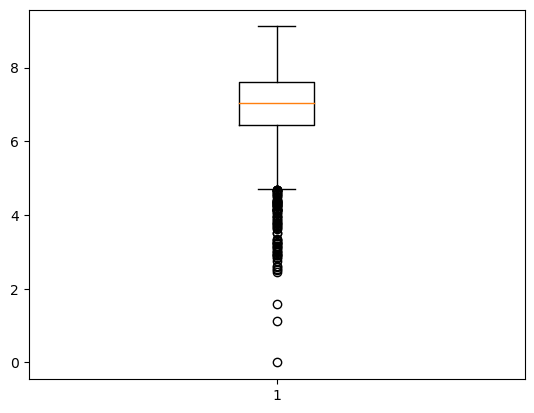

In [167]:
plt.boxplot(df_final['rating.kp'])
plt.show()

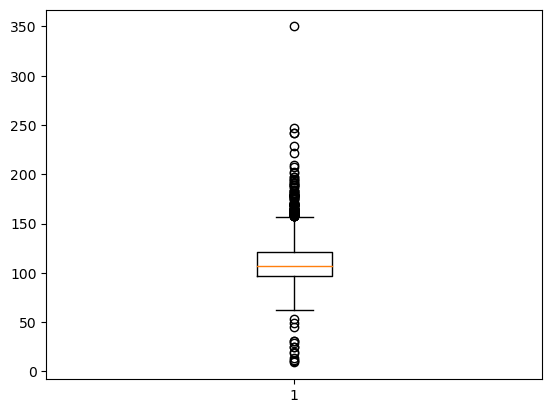

In [169]:
plt.boxplot(df_final['movieLength'])
plt.show()

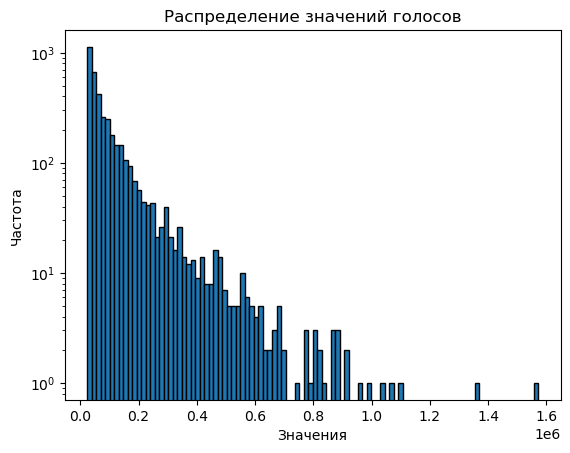

In [172]:
plt.hist(df_final['votes.kp'], bins=100, edgecolor='black', log=True)


plt.title('Распределение значений голосов')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.show()

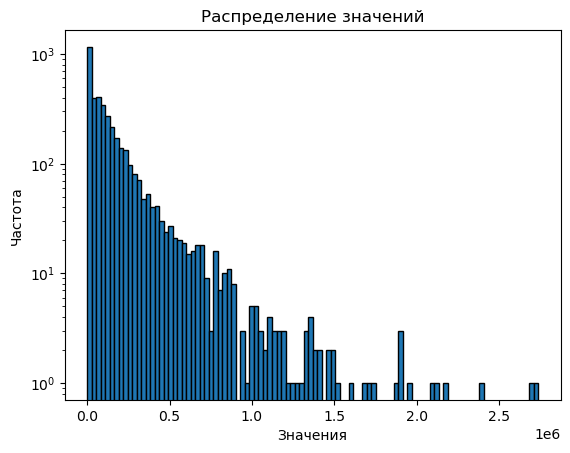

In [173]:
plt.hist(df_final['votes.imdb'], bins=100, edgecolor='black', log=True)


plt.title('Распределение значений')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.show()